In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import numpy as np
plt.style.use('fivethirtyeight')
import time
from datetime import datetime 

In [2]:
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name

In [3]:
from nba_api.stats.endpoints.cumestatsplayergames import CumeStatsPlayerGames

In [4]:
from nba_api.stats.endpoints.leagueleaders import LeagueLeaders

In [5]:
from nba_api.stats.static.teams import get_teams
from nba_api.stats.static.players import get_active_players

# 2019-2020 League Leaders

In [6]:
ll_1 = LeagueLeaders(per_mode48='PerGame', stat_category_abbreviation='PTS', season='2019-20')
df_ll_1 = ll_1.get_data_frames()[0]
df_ll_1.head()
#Per game statistics
#I've taken a look at the league leaders of last season before draft

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,201935,1,James Harden,HOU,68,36.5,9.9,22.3,0.444,4.4,...,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,34.3,32.6
1,203078,2,Bradley Beal,WAS,57,36.0,10.4,22.9,0.455,3.0,...,0.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,30.5,25.4
2,203081,3,Damian Lillard,POR,66,37.5,9.5,20.4,0.463,4.1,...,0.888,0.5,3.8,4.3,8.0,1.1,0.3,2.9,30.0,28.9
3,1629027,4,Trae Young,ATL,60,35.3,9.1,20.8,0.437,3.4,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,29.6,26.6
4,203507,5,Giannis Antetokounmpo,MIL,63,30.4,10.9,19.7,0.553,1.4,...,0.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,29.5,34.6


In [7]:
df_ll_1['eFG%'] = (df_ll_1['FGM'] + 0.5 * df_ll_1['FG3M']) / df_ll_1['FGA']

In [8]:
df_ll_1['eFG%'] = df_ll_1['eFG%'].round(2)

In [9]:
df_ll_1 = df_ll_1.sort_values(by=['PTS', 'eFG%'], ascending=False)
#Sorted by PTS and eFG%

In [10]:
print('League Average 2019-20')
for cols in df_ll_1.select_dtypes(include=['int64', 'float64']).columns:
    print(f'{cols}: {df_ll_1[cols].mean():.2f}')

League Average 2019-20
PLAYER_ID: 928477.02
RANK: 130.99
GP: 61.93
MIN: 25.26
FGM: 4.37
FGA: 9.48
FG_PCT: 0.46
FG3M: 1.34
FG3A: 3.69
FG3_PCT: 0.34
FTM: 1.95
FTA: 2.50
FT_PCT: 0.77
OREB: 1.01
DREB: 3.61
REB: 4.62
AST: 2.63
STL: 0.80
BLK: 0.50
TOV: 1.47
PTS: 12.02
EFF: 13.43
eFG%: 0.53


# 2020-2021 League Leaders

In [11]:
ll = LeagueLeaders(per_mode48='PerGame', stat_category_abbreviation='PTS')
df_ll = ll.get_data_frames()[0]
df_ll.head()
#Per game statistics

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,203078,1,Bradley Beal,WAS,10,35.9,12.1,24.5,0.494,2.4,...,0.874,1.5,3.8,5.3,5.0,1.4,0.7,3.3,34.9,30.4
1,201142,2,Kevin Durant,BKN,13,36.3,10.5,19.5,0.538,2.9,...,0.865,0.5,6.8,7.2,5.8,0.8,1.4,3.7,31.2,32.6
2,203081,3,Damian Lillard,POR,14,36.2,8.5,19.3,0.441,3.7,...,0.945,0.3,4.4,4.7,6.7,1.0,0.3,3.1,28.1,26.6
3,201939,4,Stephen Curry,GSW,16,33.9,9.1,20.1,0.453,4.2,...,0.926,0.6,4.9,5.6,6.2,1.2,0.1,3.4,27.9,26.2
4,203954,5,Joel Embiid,PHI,14,31.6,8.8,15.9,0.554,1.2,...,0.833,1.9,9.6,11.5,2.7,1.3,1.4,3.1,27.7,32.6


In [12]:
df_ll.columns

Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'EFF'],
      dtype='object')

In [13]:
df_ll['eFG%'] = (df_ll['FGM'] + 0.5 * df_ll['FG3M']) / df_ll['FGA']

In [14]:
df_ll['eFG%'] = df_ll['eFG%'].round(2)

In [15]:
df_ll = df_ll.sort_values(by=['PTS', 'eFG%'], ascending=False)

In [16]:
print('League Average 2020-2021')
for cols in df_ll.select_dtypes(include=['int64', 'float64']).columns:
    print(f'{cols}: {df_ll[cols].mean():.2f}')

League Average 2020-2021
PLAYER_ID: 990465.80
RANK: 131.87
GP: 14.26
MIN: 24.85
FGM: 4.27
FGA: 9.19
FG_PCT: 0.46
FG3M: 1.33
FG3A: 3.60
FG3_PCT: 0.33
FTM: 1.80
FTA: 2.34
FT_PCT: 0.75
OREB: 1.03
DREB: 3.67
REB: 4.70
AST: 2.58
STL: 0.81
BLK: 0.53
TOV: 1.45
PTS: 11.65
EFF: 13.34
eFG%: 0.54


# After draft

In [17]:
players_first = ['Damian Lillard', 'D\'Angelo Russell', 'Marcus Smart', 'Tobias Harris', 'Bam Adebayo', 'Al Horford', 
           'Jusuf Nurkic', 'Thomas Bryant', 'Dennis Schroder', 'Daniel Theis', 'Will Barton', 'Cam Reddish', 
           'Anthony Edwards']
#This is my team after draft

players = ['Damian Lillard', 'D\'Angelo Russell', 'Marcus Smart', 'Tobias Harris', 'Bam Adebayo', 
           'Jusuf Nurkic', 'Daniel Theis', 'Will Barton', 'Cam Reddish', 
           'Patrick Beverley', 'Hamidou Diallo']
#Anthony Edwards out, Bismack Biyombo in
#Thomas Bryant out due to injury
#Bismack Biyombo out
#Patrick Beverly in
#Hamidou Diallo in
#Dennis Schroder out
#Al Horford out

df_ll_1['Fantasy_team'] = 'N'

for player in df_ll_1.loc[: ,'PLAYER']:
    if player in players:
        df_ll_1.loc[df_ll_1[df_ll_1['PLAYER'] == player].index, 'Fantasy_team'] = 'Y'

In [18]:
df_ll_1.loc[df_ll_1.Fantasy_team == 'Y'] #My players in 2019-20 season
#Where is Jusuf Nurkic and Thomas Bryant? Anthony Edwards has been drafted in 2020. 

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PTS,EFF,eFG%,Fantasy_team
2,203081,3,Damian Lillard,POR,66,37.5,9.5,20.4,0.463,4.1,...,3.8,4.3,8.0,1.1,0.3,2.9,30.0,28.9,0.57,Y
15,1626156,16,D'Angelo Russell,MIN,45,32.3,8.0,18.8,0.426,3.5,...,3.6,3.9,6.3,1.1,0.3,3.3,23.1,19.8,0.52,Y
31,202699,32,Tobias Harris,PHI,72,34.3,7.7,16.3,0.471,1.8,...,5.9,6.9,3.2,0.7,0.6,1.4,19.6,20.3,0.53,Y
63,1628389,64,Bam Adebayo,MIA,72,33.6,6.1,11.0,0.557,0.0,...,7.8,10.2,5.1,1.1,1.3,2.8,15.9,24.3,0.55,Y
74,203115,75,Will Barton,DEN,58,33.0,5.7,12.7,0.450,1.9,...,5.0,6.3,3.7,1.1,0.5,1.5,15.1,17.5,0.52,Y
92,203935,93,Marcus Smart,BOS,60,32.0,4.3,11.4,0.375,2.3,...,3.1,3.8,4.9,1.7,0.5,1.7,12.9,14.5,0.48,Y
127,1629629,128,Cam Reddish,ATL,58,26.7,3.7,9.6,0.384,1.4,...,3.1,3.7,1.5,1.1,0.5,1.7,10.5,9.3,0.46,Y
155,1628464,156,Daniel Theis,BOS,65,24.1,3.7,6.6,0.566,0.5,...,4.4,6.6,1.7,0.6,1.3,0.8,9.2,15.3,0.60,Y
183,201976,184,Patrick Beverley,LAC,51,26.3,2.9,6.7,0.431,1.6,...,4.1,5.2,3.6,1.1,0.5,1.3,7.9,12.9,0.55,Y


In [19]:
for player in df_ll.loc[: ,'PLAYER']:
    if player in players:
        df_ll.loc[df_ll[df_ll['PLAYER'] == player].index, 'Fantasy_team'] = 'Y'

In [20]:
df_ll_fant_team = df_ll.loc[df_ll.Fantasy_team == 'Y']
df_ll_fant_team #My players in 2020-21 season

,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PTS,EFF,eFG%,Fantasy_team
2,203081,3,Damian Lillard,POR,14,36.2,8.5,19.3,0.441,3.7,...,4.4,4.7,6.7,1.0,0.3,3.1,28.1,26.6,0.54,Y
34,1626156,35,D'Angelo Russell,MIN,14,30.7,7.5,17.4,0.432,3.0,...,2.4,3.0,5.5,1.4,0.5,3.2,20.5,16.8,0.52,Y
35,1628389,36,Bam Adebayo,MIA,13,32.2,7.3,11.8,0.617,0.1,...,7.4,8.9,5.5,0.8,0.9,3.3,20.3,27.7,0.62,Y
37,202699,38,Tobias Harris,PHI,14,33.8,7.6,14.8,0.517,2.1,...,5.4,6.6,2.9,1.0,1.0,2.3,19.4,21.3,0.58,Y
78,203935,79,Marcus Smart,BOS,13,33.2,4.4,11.7,0.375,1.8,...,2.3,2.8,5.6,1.5,0.5,1.7,13.8,14.0,0.45,Y
97,1629629,98,Cam Reddish,ATL,12,28.1,4.0,10.8,0.372,1.7,...,3.8,4.7,1.2,1.3,0.3,1.6,12.4,10.9,0.45,Y
119,203115,120,Will Barton,DEN,16,28.4,4.1,9.9,0.415,1.4,...,3.5,4.1,3.0,1.0,0.6,1.2,11.1,12.2,0.48,Y
123,1628977,122,Hamidou Diallo,OKC,14,20.2,4.2,8.1,0.518,0.4,...,3.9,4.8,1.9,0.9,0.3,1.2,11.0,12.6,0.54,Y
142,203994,143,Jusuf Nurkic,POR,12,23.3,4.2,8.6,0.485,0.3,...,5.8,7.7,2.8,0.9,0.9,1.9,9.8,14.8,0.51,Y
162,1628464,163,Daniel Theis,BOS,14,22.6,3.7,5.9,0.627,0.6,...,4.0,5.3,1.2,0.4,0.8,1.1,8.5,12.4,0.68,Y


In [21]:
from nba_api.stats.endpoints.cumestatsplayergames import CumeStatsPlayerGames

In [22]:
player_ids = list(df_ll_fant_team.PLAYER_ID)
game_ids = []

for ids in player_ids:
    df = CumeStatsPlayerGames(player_id=ids, league_id='00', season='2020-21', 
                                     season_type_all_star='Regular Season').get_data_frames()[0]
    game_ids.append(df)
game_ids = pd.concat(game_ids)
time.sleep(2)

In [23]:
game_ids.index = range(0,len(game_ids))

In [24]:
game_ids['MATCHUP_DATE'] = '-'
for i in range(0, len(game_ids.MATCHUP)):
    game_ids['MATCHUP_DATE'].iloc[i] = game_ids.MATCHUP.str.split(' ').iloc[i][0]

In [25]:
game_ids['MATCHUP_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP)):
    game_ids['MATCHUP_TEAM'].iloc[i] = game_ids.MATCHUP.str.split(' ').iloc[i][1:]

In [26]:
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.MATCHUP_TEAM.iloc[i] = ' '.join(game_ids.MATCHUP_TEAM.iloc[i])

In [27]:
game_ids = game_ids.drop(labels='MATCHUP', axis=1)

In [28]:
game_ids['HOME_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.HOME_TEAM.iloc[i] = game_ids.MATCHUP_TEAM.iloc[i].split('at')[1]

In [29]:
game_ids['AWAY_TEAM'] = '-'
for i in range(0, len(game_ids.MATCHUP_TEAM)):
    game_ids.AWAY_TEAM.iloc[i] = game_ids.MATCHUP_TEAM.iloc[i].split('at')[0]

In [30]:
game_ids = game_ids.drop('MATCHUP_TEAM', axis=1)
game_ids

,GAME_ID,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
0,0022000207,01/18/2021,Trail Blazers,Spurs
1,0022000195,01/16/2021,Trail Blazers,Hawks
2,0022000178,01/14/2021,Trail Blazers,Pacers
3,0022000173,01/13/2021,Kings,Trail Blazers
4,0022000155,01/11/2021,Trail Blazers,Raptors
...,...,...,...,...
146,0022000061,12/30/2020,Clippers,Trail Blazers
147,0022000054,12/29/2020,Clippers,Timberwolves
148,0022000031,12/27/2020,Clippers,Mavericks
149,0022000009,12/25/2020,Nuggets,Clippers


In [31]:
game_ids.HOME_TEAM = game_ids.HOME_TEAM.str.replace(' ', '')

In [32]:
game_ids.AWAY_TEAM = game_ids.AWAY_TEAM.str.replace(' ', '')

In [33]:
game_ids.loc[game_ids.HOME_TEAM == 'He', 'HOME_TEAM'] = 'Heat'

In [34]:
game_ids[game_ids.HOME_TEAM == '']

,GAME_ID,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
28,0022000244,01/23/2021,,He
29,0022000234,01/22/2021,,He
30,0022000220,01/20/2021,,He
33,0022000136,01/09/2021,,He
36,0022000071,01/01/2021,,He
40,0022000012,12/23/2020,,He
45,0022000174,01/14/2021,,He


In [35]:
from nba_api.stats.endpoints.leaguegamelog import LeagueGameLog

In [36]:
lgl = LeagueGameLog()
time.sleep(2)

In [37]:
df_lgl = lgl.get_data_frames()[0]

In [38]:
df_lgl.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [39]:
df_lgl[df_lgl.GAME_ID == '0022000071']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
136,22020,1610612748,MIA,Miami Heat,0022000071,2021-01-01,MIA @ DAL,L,240,29,...,36,41,20,10,2,16,24,83,-10,1
137,22020,1610612742,DAL,Dallas Mavericks,0022000071,2021-01-01,DAL vs. MIA,W,240,32,...,45,49,18,9,3,17,25,93,10,1


In [40]:
game_ids.loc[game_ids.GAME_ID == '0022000071', 'HOME_TEAM'] = 'Mavericks'

In [41]:
df_lgl[df_lgl.GAME_ID == '0022000012']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
4,22020,1610612753,ORL,Orlando Magic,0022000012,2020-12-23,ORL vs. MIA,W,240,42,...,30,41,23,15,3,18,19,113,6,1
5,22020,1610612748,MIA,Miami Heat,0022000012,2020-12-23,MIA @ ORL,L,240,42,...,36,43,25,11,2,22,21,107,-6,1


In [42]:
game_ids.loc[game_ids.GAME_ID == '0022000012', 'HOME_TEAM'] = 'Magic'

In [43]:
game_ids.loc[game_ids.AWAY_TEAM == 'He', 'AWAY_TEAM'] = 'Heat'

In [44]:
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2

In [45]:
new_data = []
for i in list(game_ids.GAME_ID):
    df = BoxScoreTraditionalV2(game_id=i).get_data_frames()[0]
    new_data.append(df)
new_data = pd.concat(new_data)
time.sleep(2)

In [46]:
new_data.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0022000207,1610612759,SAS,San Antonio,201942,DeMar DeRozan,F,,32:17,6.0,...,1.0,5.0,6.0,11.0,2.0,0.0,4.0,0.0,20.0,9.0
1,0022000207,1610612759,SAS,San Antonio,1629640,Keldon Johnson,F,,24:32,3.0,...,0.0,4.0,4.0,1.0,0.0,0.0,2.0,2.0,10.0,-2.0
2,0022000207,1610612759,SAS,San Antonio,200746,LaMarcus Aldridge,C,,24:15,10.0,...,0.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,22.0,0.0
3,0022000207,1610612759,SAS,San Antonio,1629022,Lonnie Walker IV,G,,27:35,2.0,...,0.0,5.0,5.0,2.0,0.0,0.0,2.0,4.0,5.0,9.0
4,0022000207,1610612759,SAS,San Antonio,1627749,Dejounte Murray,G,,31:32,4.0,...,0.0,9.0,9.0,11.0,0.0,1.0,1.0,3.0,9.0,14.0


In [47]:
df_inner_join = pd.merge(new_data, game_ids, on='GAME_ID', how='inner')

In [48]:
df_inner_join.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
0,0022000207,1610612759,SAS,San Antonio,201942,DeMar DeRozan,F,,32:17,6.0,...,11.0,2.0,0.0,4.0,0.0,20.0,9.0,01/18/2021,TrailBlazers,Spurs
1,0022000207,1610612759,SAS,San Antonio,1629640,Keldon Johnson,F,,24:32,3.0,...,1.0,0.0,0.0,2.0,2.0,10.0,-2.0,01/18/2021,TrailBlazers,Spurs
2,0022000207,1610612759,SAS,San Antonio,200746,LaMarcus Aldridge,C,,24:15,10.0,...,1.0,1.0,1.0,1.0,0.0,22.0,0.0,01/18/2021,TrailBlazers,Spurs
3,0022000207,1610612759,SAS,San Antonio,1629022,Lonnie Walker IV,G,,27:35,2.0,...,2.0,0.0,0.0,2.0,4.0,5.0,9.0,01/18/2021,TrailBlazers,Spurs
4,0022000207,1610612759,SAS,San Antonio,1627749,Dejounte Murray,G,,31:32,4.0,...,11.0,0.0,1.0,1.0,3.0,9.0,14.0,01/18/2021,TrailBlazers,Spurs


In [49]:
df_inner_join = df_inner_join.drop_duplicates()
df_inner_join = df_inner_join.sort_values(by='MATCHUP_DATE', ascending=False)

In [50]:
df_inner_join['MATCHUP_DATE'] = pd.to_datetime(df_inner_join.MATCHUP_DATE)

In [51]:
df_inner_join = df_inner_join.sort_values(by='MATCHUP_DATE')

In [52]:
df_inner_join.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
       'MATCHUP_DATE', 'HOME_TEAM', 'AWAY_TEAM'],
      dtype='object')

In [53]:
df_inner_join_fant = df_inner_join[['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID','PLAYER_NAME', 
                                    'START_POSITION', 'COMMENT', 'MIN', 'FG_PCT', 'FT_PCT', 'FG3M', 'PTS', 'REB', 'AST', 
                                    'STL', 'BLK', 'TO', 'MATCHUP_DATE', 'HOME_TEAM', 'AWAY_TEAM']]
df_inner_join_fant
#Dataframe of my players' games.
#Parameters are the ones considered in fantasy game.
#'FG_PCT', 'FT_PCT', 'FG3M', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TO'

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FG_PCT,...,FG3M,PTS,REB,AST,STL,BLK,TO,MATCHUP_DATE,HOME_TEAM,AWAY_TEAM
6397,0022000002,1610612746,LAC,LA,201587,Nicolas Batum,F,,28:10,0.250,...,1.0,3.0,6.0,6.0,2.0,0.0,1.0,2020-12-22,Lakers,Clippers
6409,0022000002,1610612746,LAC,LA,1630187,Daniel Oturu,,DNP - Coach's Decision,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-22,Lakers,Clippers
6410,0022000002,1610612747,LAL,Los Angeles,2544,LeBron James,F,,28:21,0.412,...,3.0,22.0,5.0,5.0,0.0,0.0,4.0,2020-12-22,Lakers,Clippers
6396,0022000002,1610612746,LAC,LA,202695,Kawhi Leonard,F,,34:00,0.385,...,1.0,26.0,2.0,3.0,2.0,0.0,3.0,2020-12-22,Lakers,Clippers
6398,0022000002,1610612746,LAC,LA,201586,Serge Ibaka,C,,20:32,0.714,...,2.0,15.0,6.0,0.0,0.0,1.0,1.0,2020-12-22,Lakers,Clippers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5113,0022000248,1610612743,DEN,Denver,1627750,Jamal Murray,G,,43:18,0.455,...,3.0,26.0,6.0,5.0,0.0,1.0,2.0,2021-01-23,Suns,Nuggets
5112,0022000248,1610612743,DEN,Denver,203914,Gary Harris,G,,36:38,0.375,...,3.0,10.0,3.0,0.0,1.0,0.0,1.0,2021-01-23,Suns,Nuggets
5111,0022000248,1610612743,DEN,Denver,203999,Nikola Jokic,C,,42:00,0.429,...,0.0,29.0,22.0,6.0,1.0,0.0,6.0,2021-01-23,Suns,Nuggets
2254,0022000244,1610612751,BKN,Brooklyn,204020,Tyler Johnson,,DNP - Coach's Decision,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-23,,Heat


In [54]:
df_inner_join_fant.index = range(0, len(df_inner_join_fant))

Damian Lillard


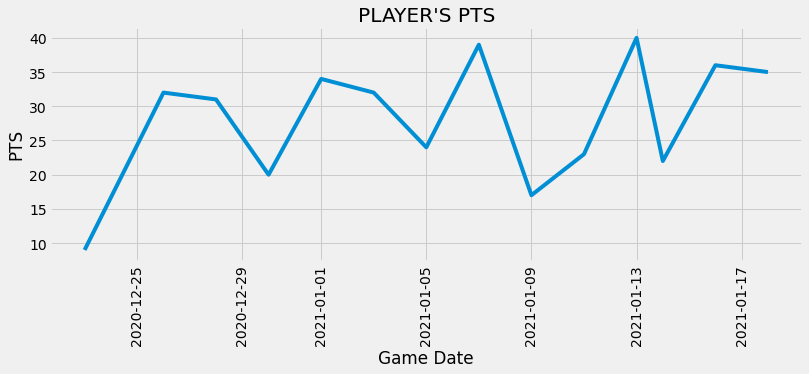

D'Angelo Russell


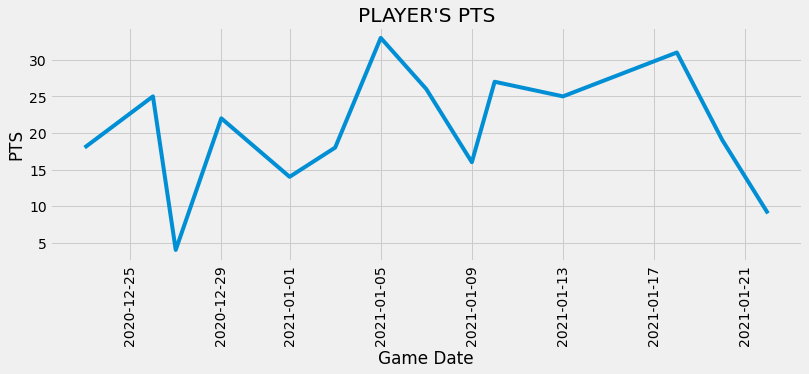

Marcus Smart


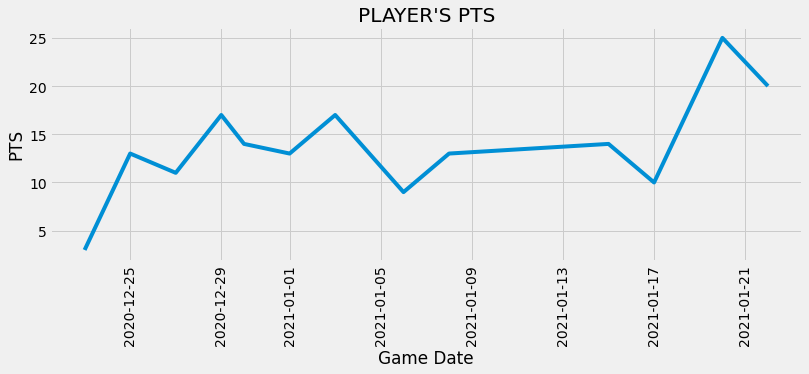

Tobias Harris


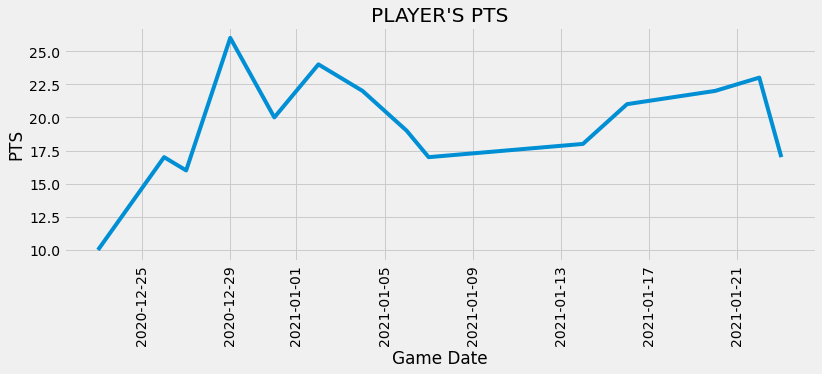

Bam Adebayo


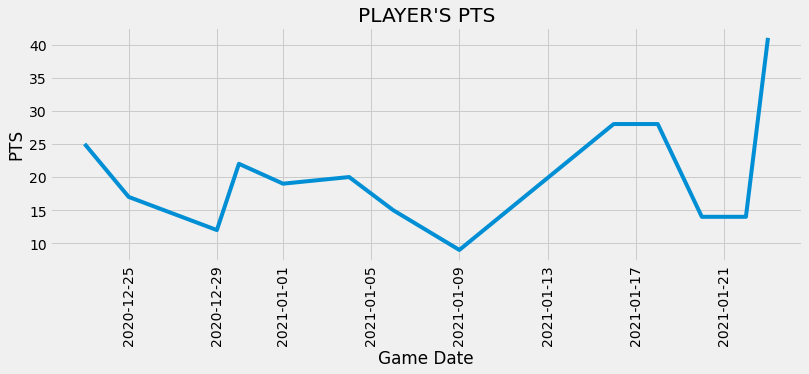

Jusuf Nurkic


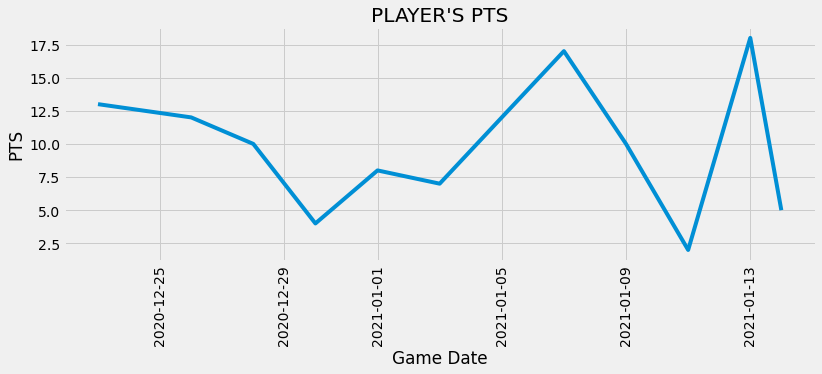

Daniel Theis


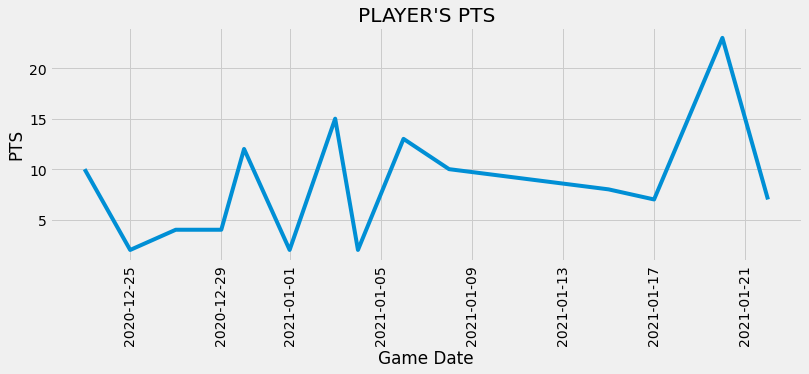

Will Barton


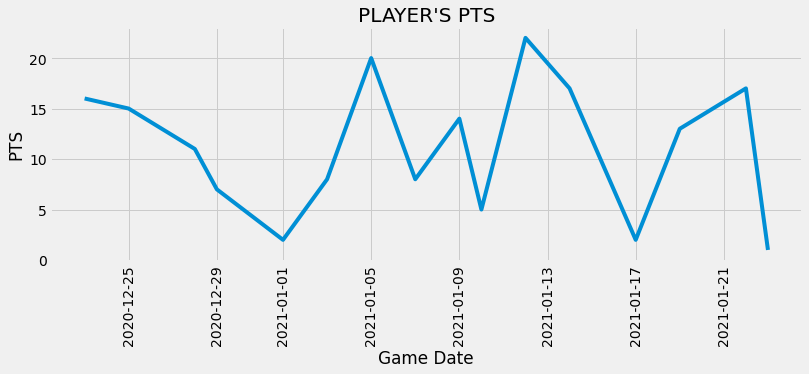

Cam Reddish


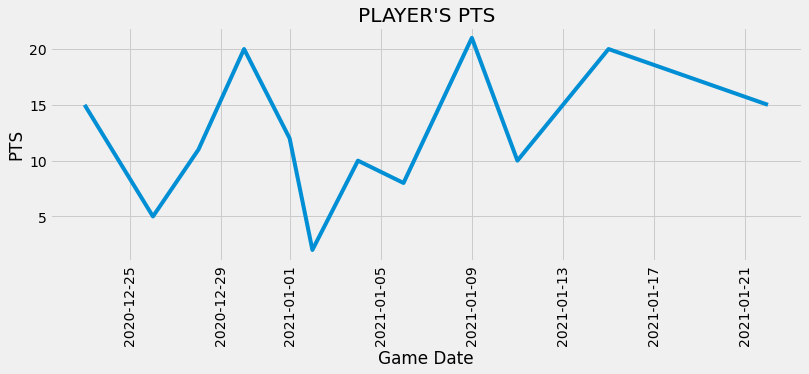

Patrick Beverley


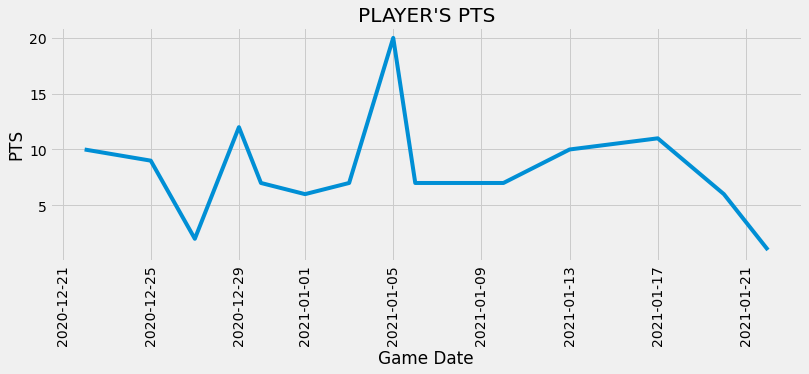

Hamidou Diallo


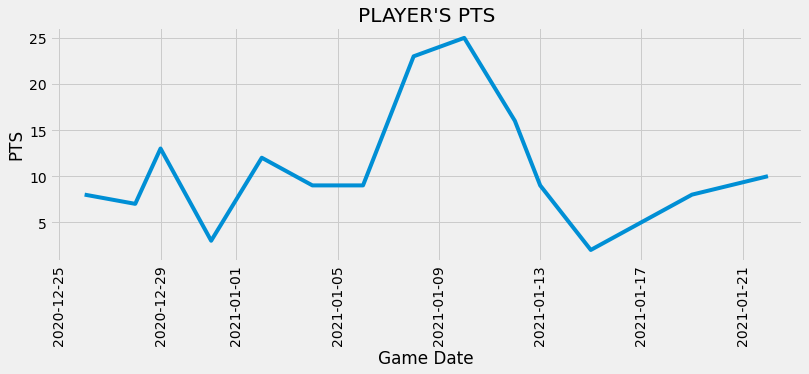

In [55]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    sns.lineplot(x='MATCHUP_DATE', y='PTS', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S PTS')
    plt.xlabel('Game Date')
    plt.ylabel('PTS')
    plt.xticks(rotation=90)
    plt.show()
#PTS trend of my players

Damian Lillard


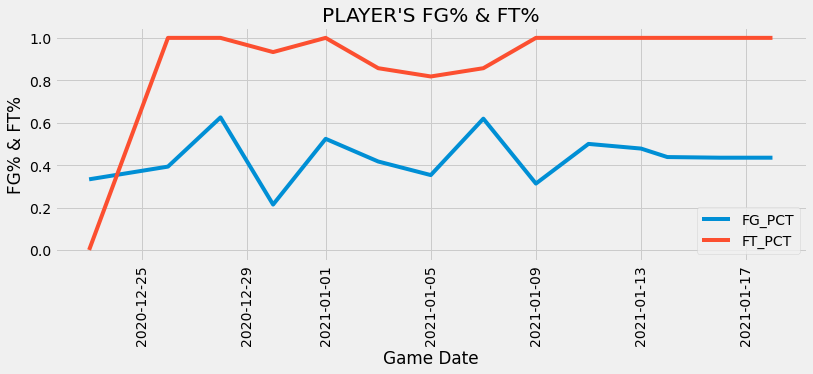

D'Angelo Russell


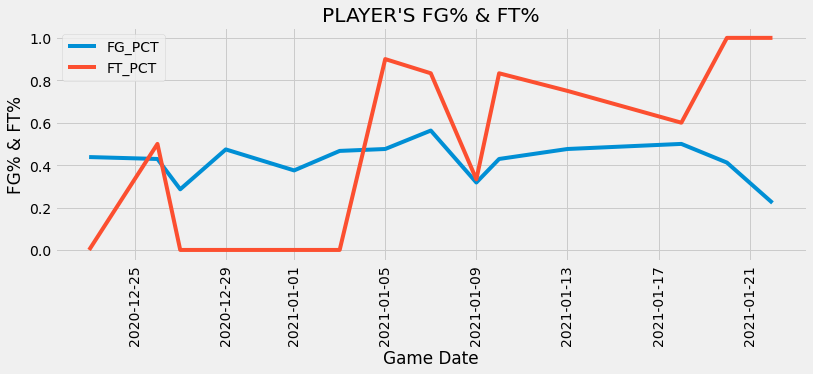

Marcus Smart


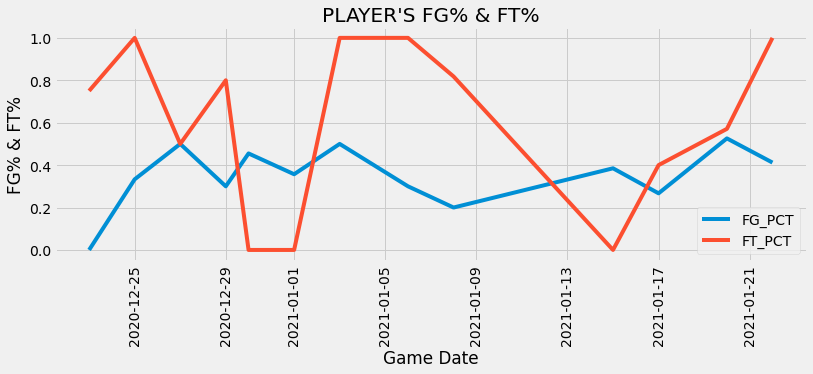

Tobias Harris


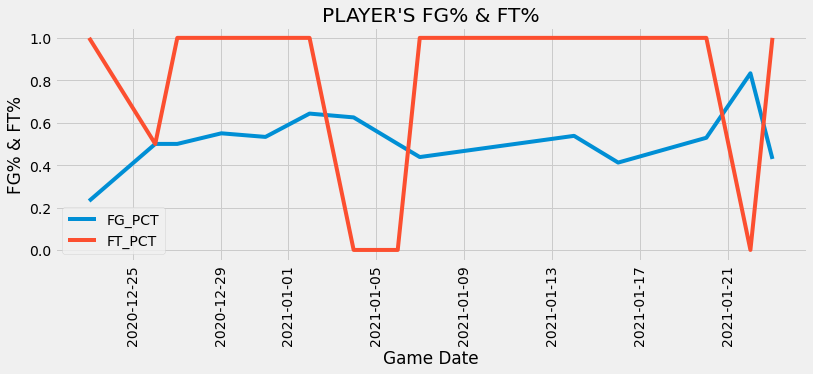

Bam Adebayo


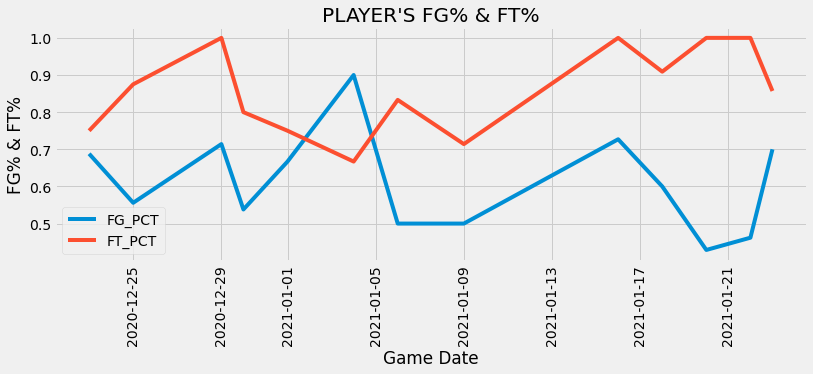

Jusuf Nurkic


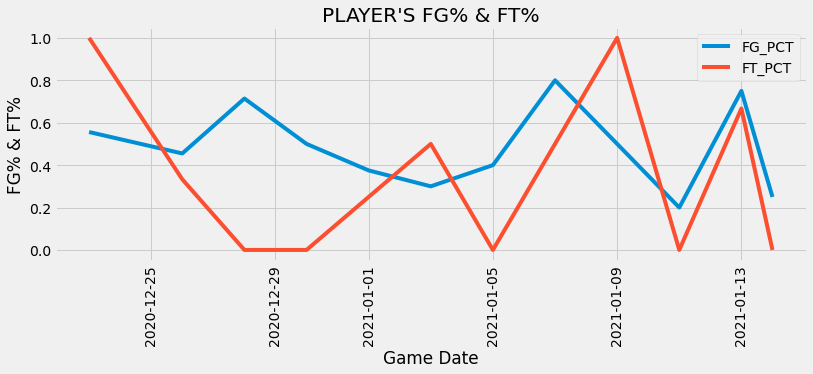

Daniel Theis


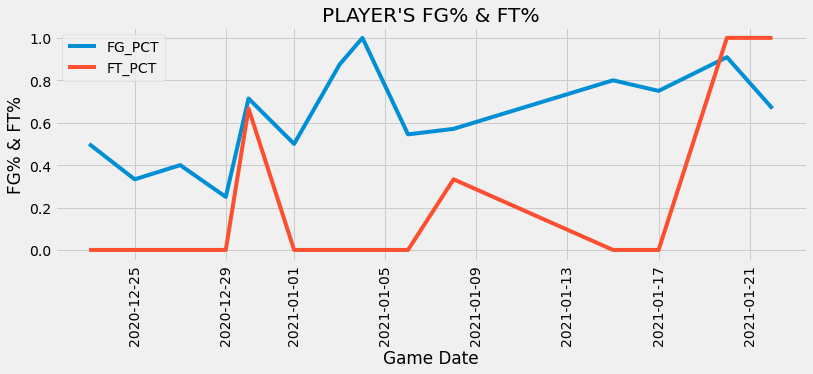

Will Barton


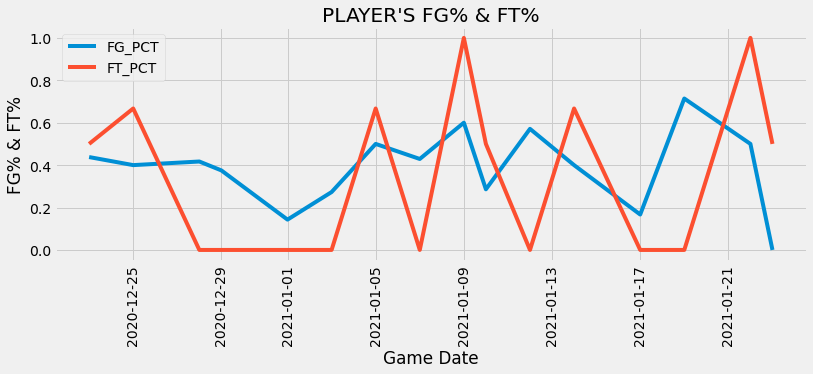

Cam Reddish


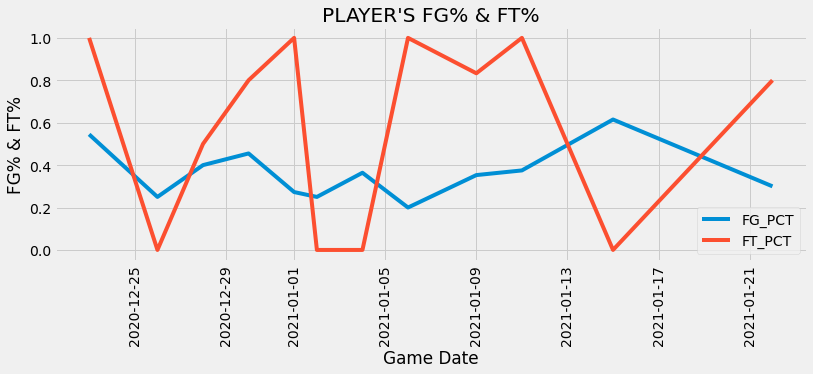

Patrick Beverley


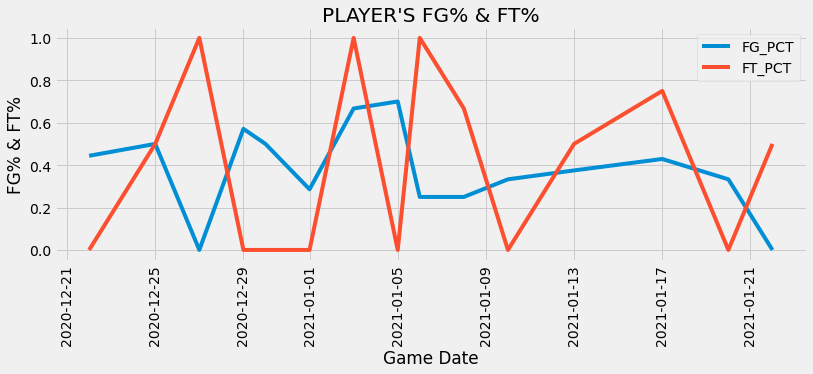

Hamidou Diallo


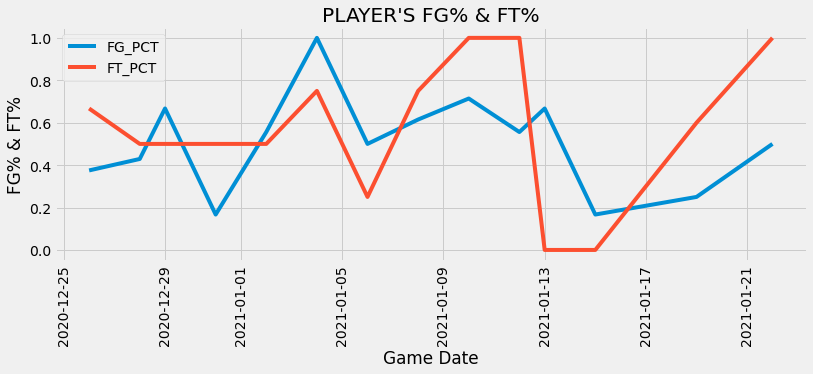

In [56]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    sns.lineplot(x='MATCHUP_DATE', y='FG_PCT', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='FT_PCT', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S FG% & FT%')
    plt.xlabel('Game Date')
    plt.ylabel('FG% & FT%')
    plt.xticks(rotation=90)
    plt.legend(['FG_PCT', 'FT_PCT'], loc='best')
    plt.show()
#FG% and FT% trends of my players

Damian Lillard


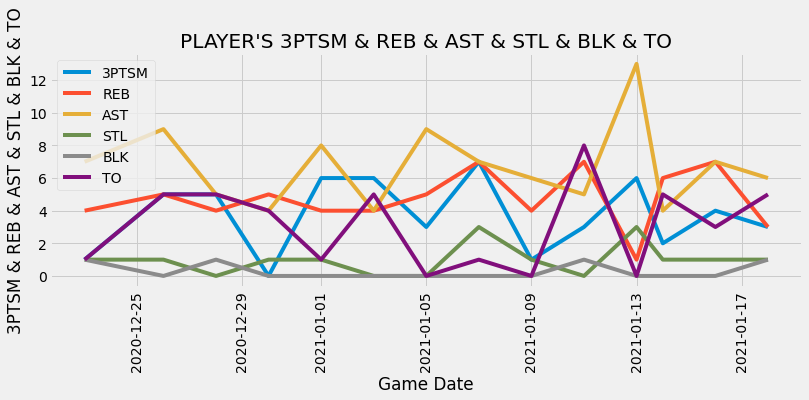

D'Angelo Russell


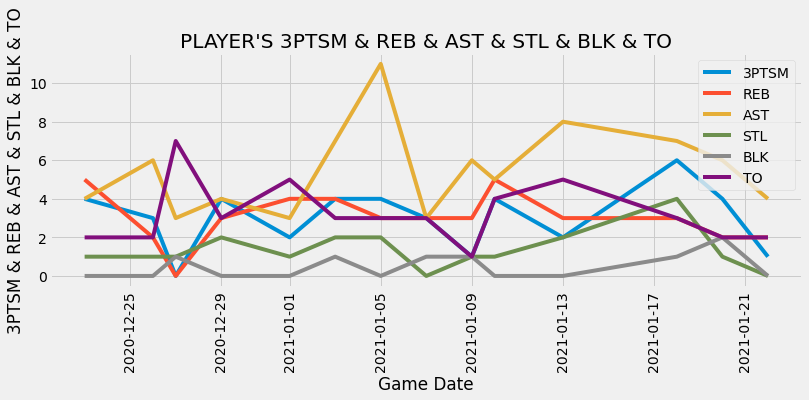

Marcus Smart


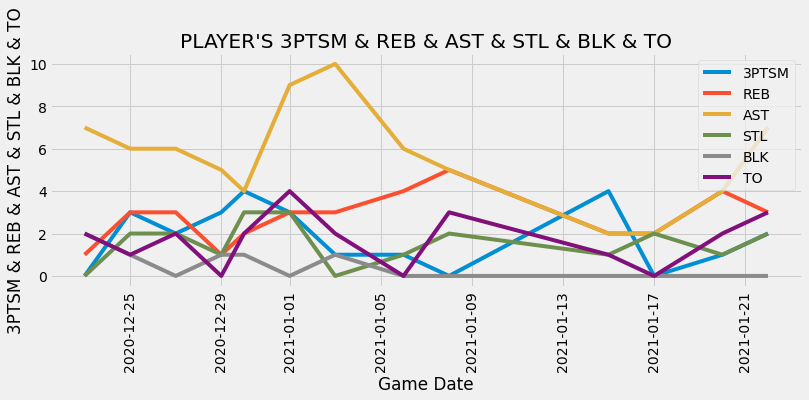

Tobias Harris


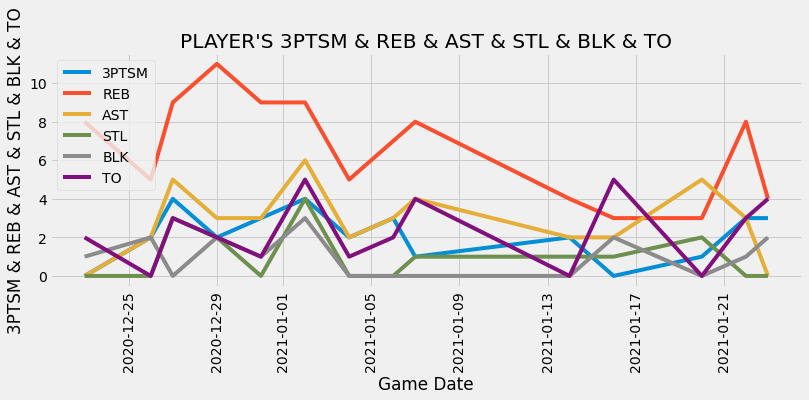

Bam Adebayo


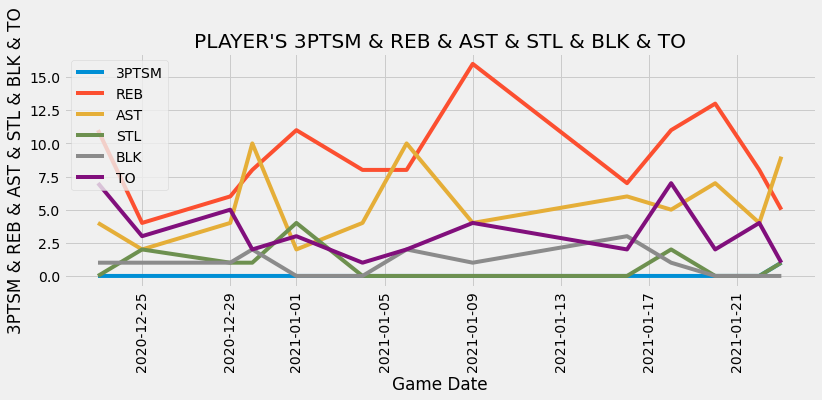

Jusuf Nurkic


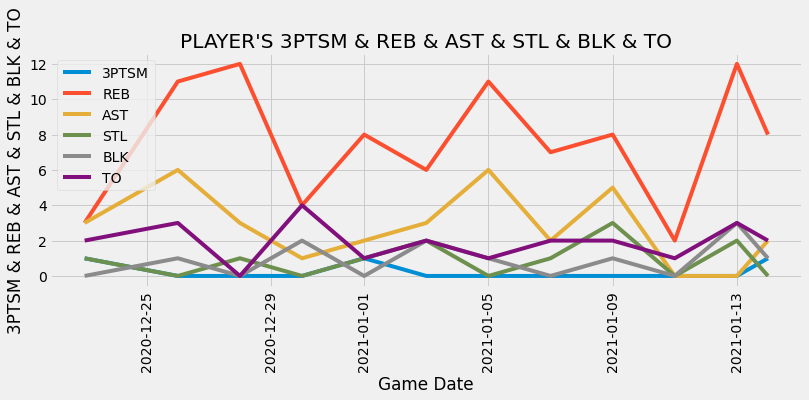

Daniel Theis


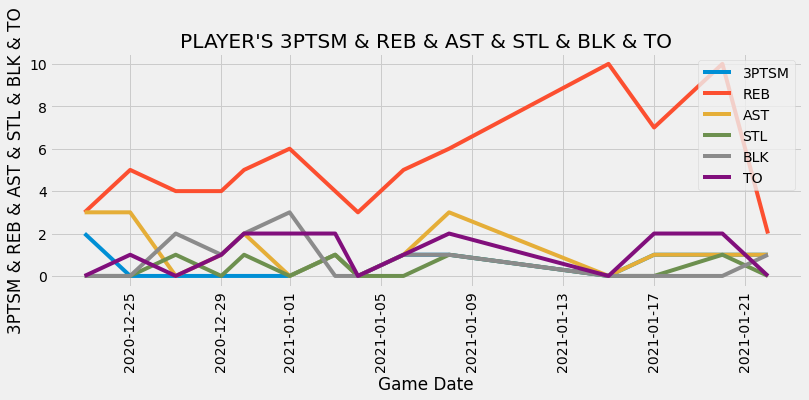

Will Barton


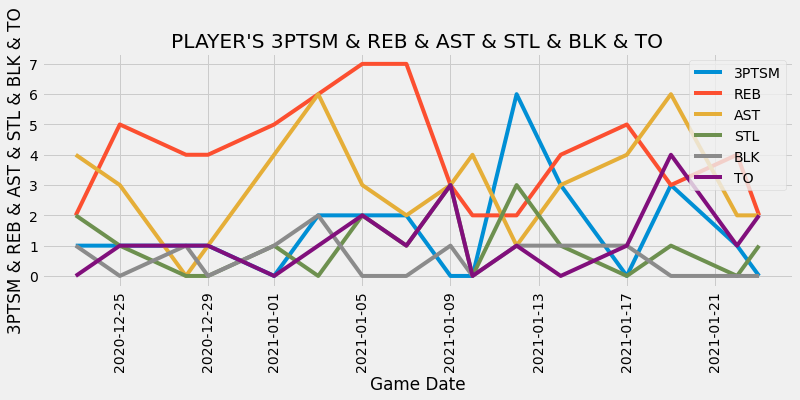

Cam Reddish


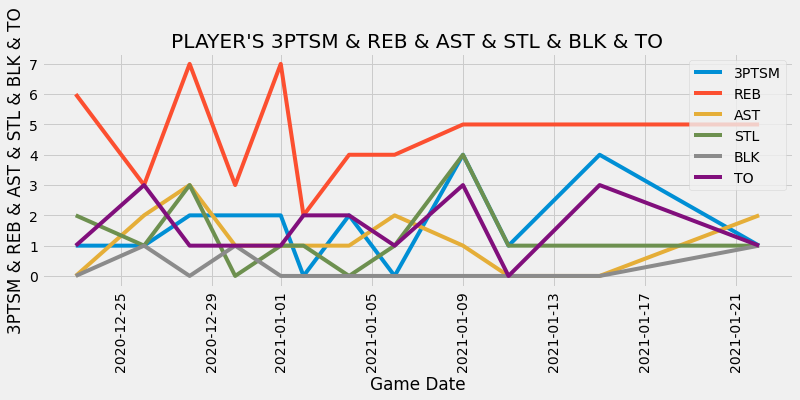

Patrick Beverley


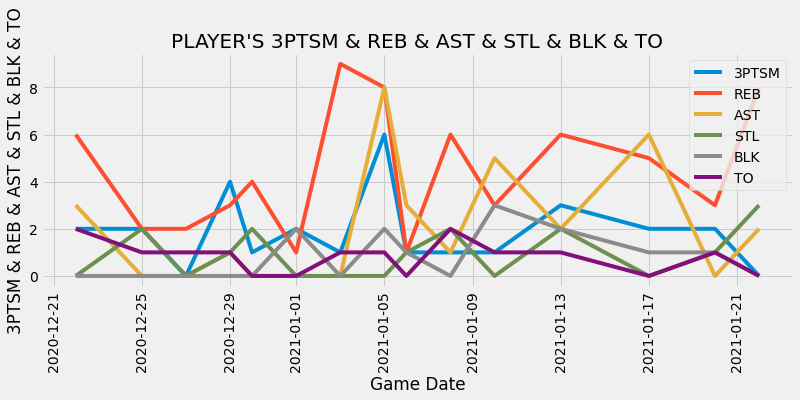

Hamidou Diallo


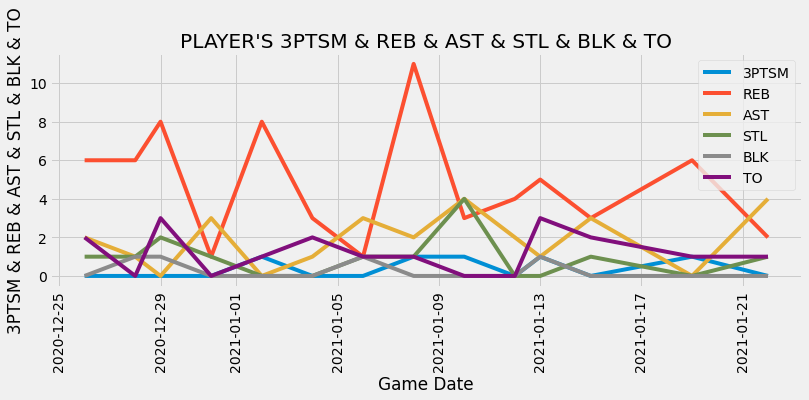

In [57]:
for i in players:
    print(i)
    plt.figure(figsize=(12,4))
    sns.lineplot(x='MATCHUP_DATE', y='FG3M', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='REB', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='AST', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='STL', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='BLK', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    sns.lineplot(x='MATCHUP_DATE', y='TO', data=df_inner_join[df_inner_join.PLAYER_NAME == i])
    plt.title('PLAYER\'S 3PTSM & REB & AST & STL & BLK & TO')
    plt.xlabel('Game Date')
    plt.ylabel('3PTSM & REB & AST & STL & BLK & TO')
    plt.xticks(rotation=90)
    plt.legend(['3PTSM', 'REB', 'AST', 'STL', 'BLK', 'TO'], loc='best')
    plt.show()
#3PTSM, REB, AST, STL, BLK, TO trends of my players

###Finding a player's stats in regular season

In [73]:
player = 'Wayne Ellington'
player_id = find_players_by_full_name(player)[0]['id']
player_cumestats = CumeStatsPlayerGames(player_id=player_id)
player_cumestats_df = player_cumestats.get_data_frames()[0]

player_cumestats_df['DATE'] = '-'
player_cumestats_df['HOME'] = '-'
player_cumestats_df['AWAY'] = '-'
for i in range(0, len(player_cumestats_df.MATCHUP)):
    player_cumestats_df['DATE'][i] = player_cumestats_df.MATCHUP.str.split(' ')[i][0]
    player_cumestats_df['HOME'][i] = player_cumestats_df.MATCHUP.str.split(' ')[i][3]
    player_cumestats_df['AWAY'][i] = player_cumestats_df.MATCHUP.str.split(' ')[i][1]
    
player_cumestats_df['DATE'] = pd.to_datetime(player_cumestats_df['DATE'])
player_cumestats_df = player_cumestats_df.drop('MATCHUP', axis=1)

player_boxscore_df = []
for ids in player_cumestats_df.GAME_ID.values:
    df = BoxScoreTraditionalV2(ids).get_data_frames()[0]
    player_boxscore_df.append(df)
player_boxscore_df = pd.concat(player_boxscore_df)

player_boxscore_df = player_boxscore_df.loc[player_boxscore_df['PLAYER_ID'] == player_id]

final_df = pd.merge(player_boxscore_df, player_cumestats_df, how='inner', on='GAME_ID')
final_df = final_df.sort_values(by='DATE')

time.sleep(2)

In [74]:
final_df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,DATE,HOME,AWAY
10,0022000041,1610612765,DET,Detroit,201961,Wayne Ellington,,,20:33,4.0,...,0.0,0.0,0.0,1.0,2.0,11.0,-6.0,2020-12-28,Hawks,Pistons
9,0022000099,1610612765,DET,Detroit,201961,Wayne Ellington,G,,24:50,5.0,...,2.0,1.0,0.0,0.0,1.0,13.0,-8.0,2021-01-04,Bucks,Pistons
8,0022000113,1610612765,DET,Detroit,201961,Wayne Ellington,G,,23:52,5.0,...,0.0,1.0,1.0,0.0,2.0,12.0,-17.0,2021-01-06,Bucks,Pistons
7,0022000123,1610612765,DET,Detroit,201961,Wayne Ellington,,,0:04,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2021-01-08,Pistons,Suns
6,0022000141,1610612765,DET,Detroit,201961,Wayne Ellington,,,13:21,2.0,...,0.0,0.0,2.0,0.0,2.0,6.0,1.0,2021-01-10,Pistons,Jazz
5,0022000165,1610612765,DET,Detroit,201961,Wayne Ellington,G,,14:24,2.0,...,1.0,0.0,0.0,1.0,1.0,5.0,-5.0,2021-01-13,Pistons,Bucks
4,0022000192,1610612765,DET,Detroit,201961,Wayne Ellington,G,,26:03,3.0,...,0.0,0.0,0.0,1.0,3.0,9.0,12.0,2021-01-16,Heat,Pistons
3,0022000206,1610612765,DET,Detroit,201961,Wayne Ellington,G,,27:30,7.0,...,2.0,0.0,0.0,2.0,3.0,24.0,19.0,2021-01-18,Heat,Pistons
2,0022000219,1610612765,DET,Detroit,201961,Wayne Ellington,G,,33:26,5.0,...,3.0,0.0,0.0,1.0,0.0,16.0,-11.0,2021-01-20,Hawks,Pistons
1,0022000230,1610612765,DET,Detroit,201961,Wayne Ellington,G,,32:45,6.0,...,0.0,1.0,0.0,1.0,2.0,18.0,16.0,2021-01-22,Pistons,Rockets


In [75]:
final_df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
       'DATE', 'HOME', 'AWAY'],
      dtype='object')

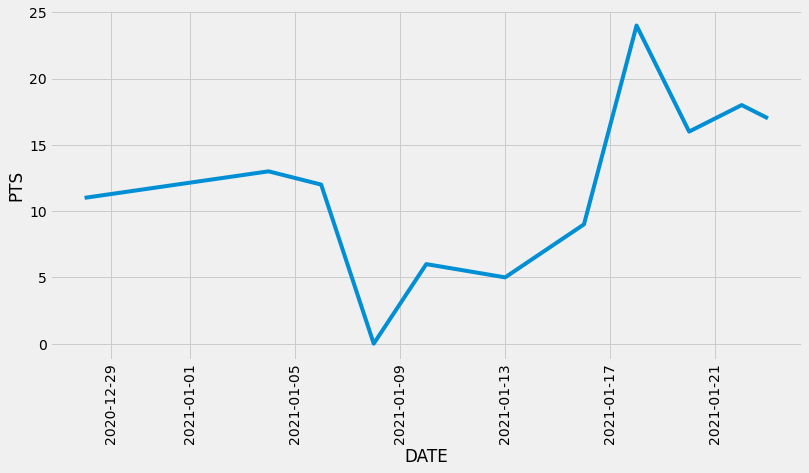

In [76]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='PTS', data=final_df)
plt.xticks(rotation=90)
plt.show()

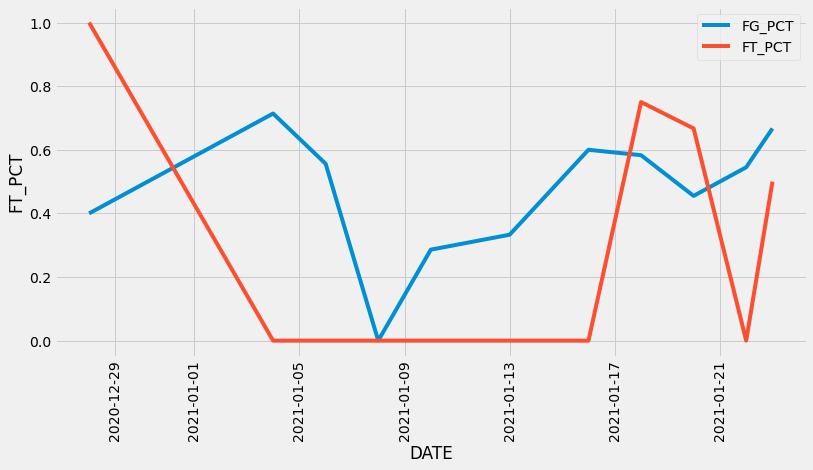

In [77]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='FG_PCT', data=final_df)
sns.lineplot(x='DATE', y='FT_PCT', data=final_df)
plt.xticks(rotation=90)
plt.legend(['FG_PCT', 'FT_PCT'], loc='best')
plt.show()

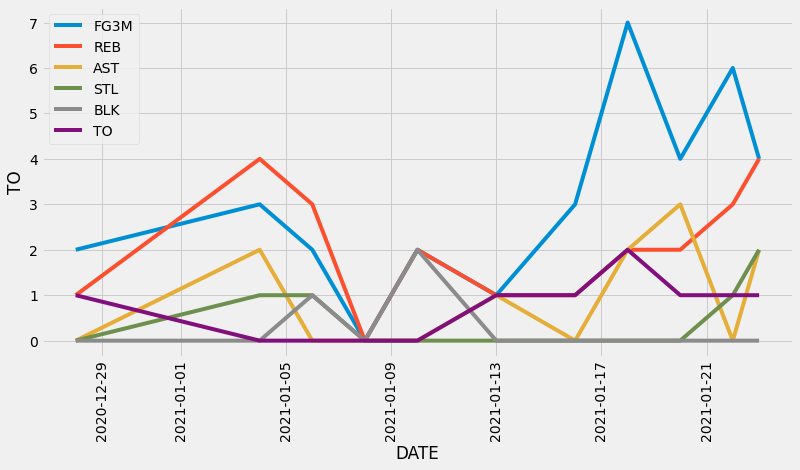

In [78]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='FG3M', data=final_df)
sns.lineplot(x='DATE', y='REB', data=final_df)
sns.lineplot(x='DATE', y='AST', data=final_df)
sns.lineplot(x='DATE', y='STL', data=final_df)
sns.lineplot(x='DATE', y='BLK', data=final_df)
sns.lineplot(x='DATE', y='TO', data=final_df)
plt.xticks(rotation=90)
plt.legend(['FG3M', 'REB', 'AST', 'STL', 'BLK', 'TO'], loc='best')
plt.show()